# Pancreatic endocrinogenesis

In [ ]:
# get the latest version from pypi 
# for other installations approaches, see https://dynamo-release.readthedocs.io/en/latest/ten_minutes_to_dynamo.html#how-to-install
!pip install dynamo-release --upgrade --quiet

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))
# %matplotlib inline

import dynamo as dyn 

this is like R's sessionInfo()

In [2]:
dyn.get_all_dependencies_version()

package dynamo-release    tqdm anndata cvxopt hdbscan loompy matplotlib  \
version         0.95.0  4.48.0   0.7.4  1.2.3  0.8.26  3.0.6      3.3.0   

package   numba   numpy pandas pynndescent python-igraph scikit-learn  scipy  \
version  0.48.0  1.19.1  1.1.0       0.4.8         0.8.2       0.23.1  1.5.2   

package seaborn setuptools statsmodels  trimap umap-learn numdifftools  \
version   0.9.0     49.6.0      0.11.1  1.0.12      0.4.3       0.9.39   

package colorcet  
version    2.0.2

/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/xqiu/anaconda3/lib/python3.6/site-p

<Figure size 600x400 with 0 Axes>

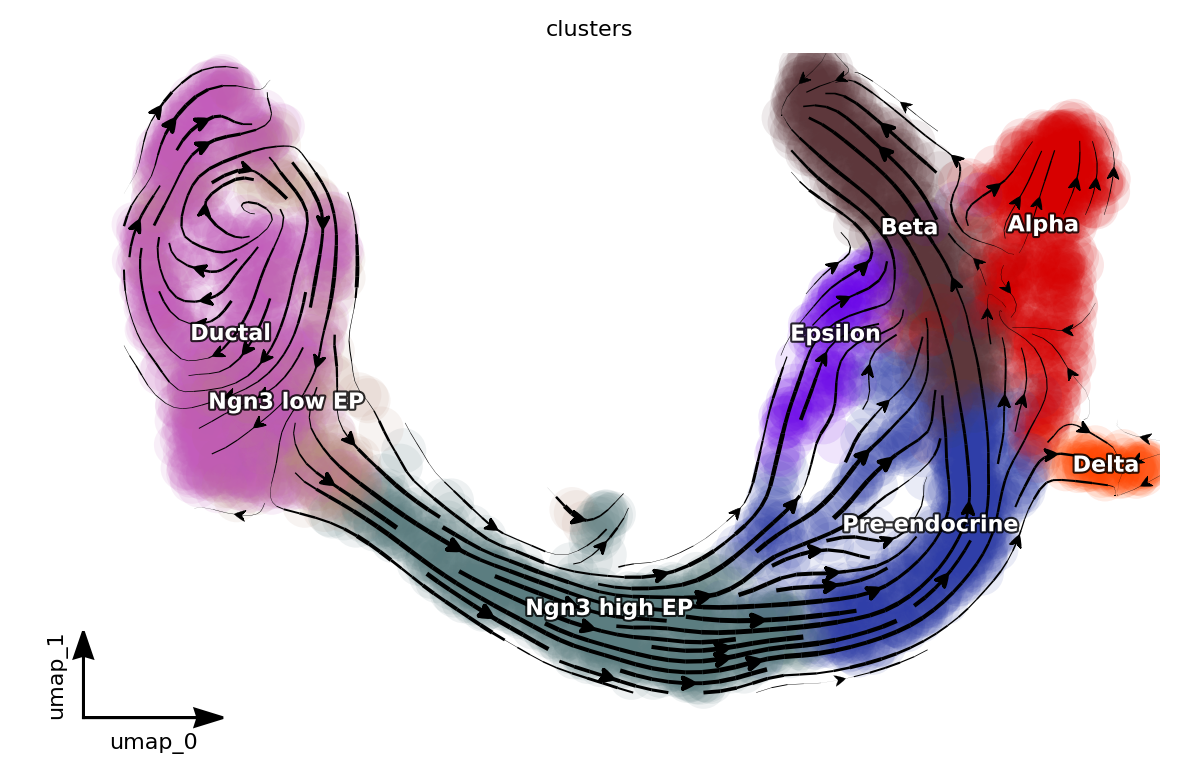

In [3]:
# run dynamo to get RNA velocity 

dyn.configuration.set_figure_params('dynamo', background='white')

adata = dyn.sample_data.pancreatic_endocrinogenesis()

dyn.pp.recipe_monocle(adata, n_top_genes=1000, fg_kwargs={'shared_count': 20})

dyn.tl.dynamics(adata, model='stochastic')

dyn.tl.reduceDimension(adata, n_pca_components=30)

dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'})
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True)


/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


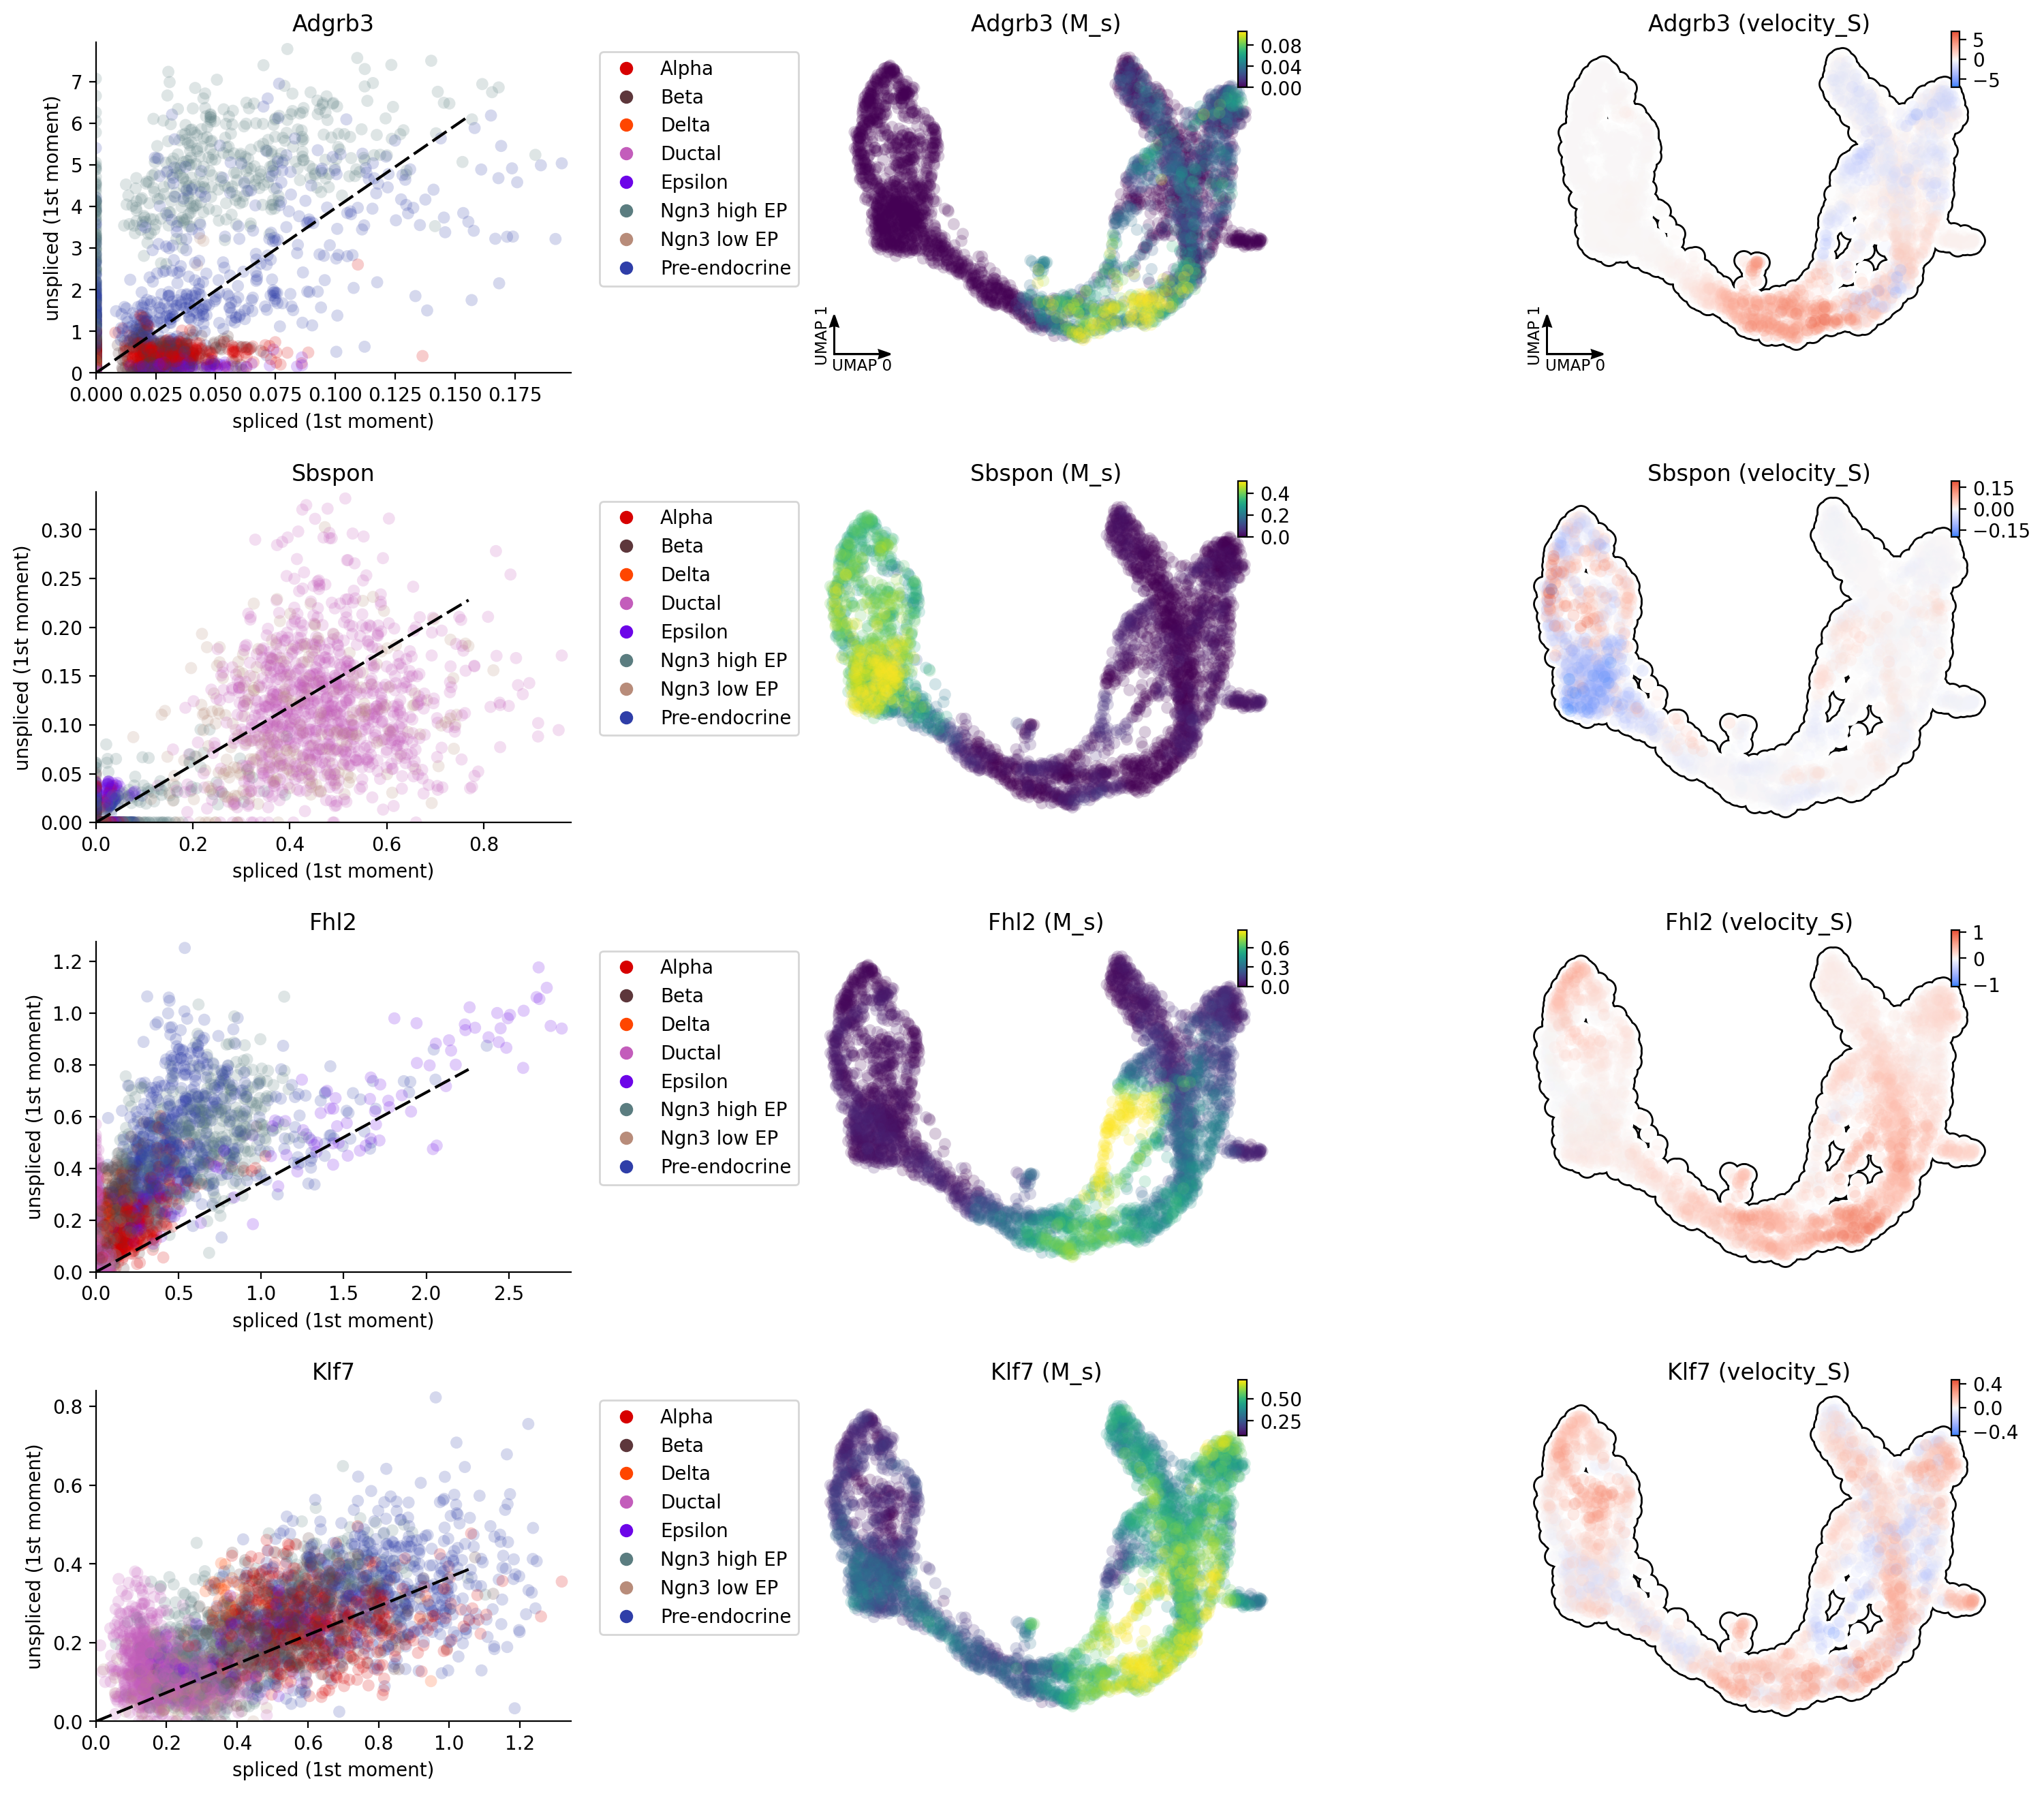

In [4]:
dyn.pl.phase_portraits(adata, genes=adata.var_names[adata.var.use_for_dynamics][:4], figsize=(6, 4), color='clusters')

/Users/xqiu/anaconda3/lib/python3.6/site-packages/dynamo_release-0.95.0-py3.6.egg/dynamo/plot/scatters.py:452: FutureWarning: Categorical.to_dense is deprecated and will be removed in a future version.  Use np.asarray(cat) instead.
  labels = _color.to_dense() if is_categorical_dtype(_color) else _color


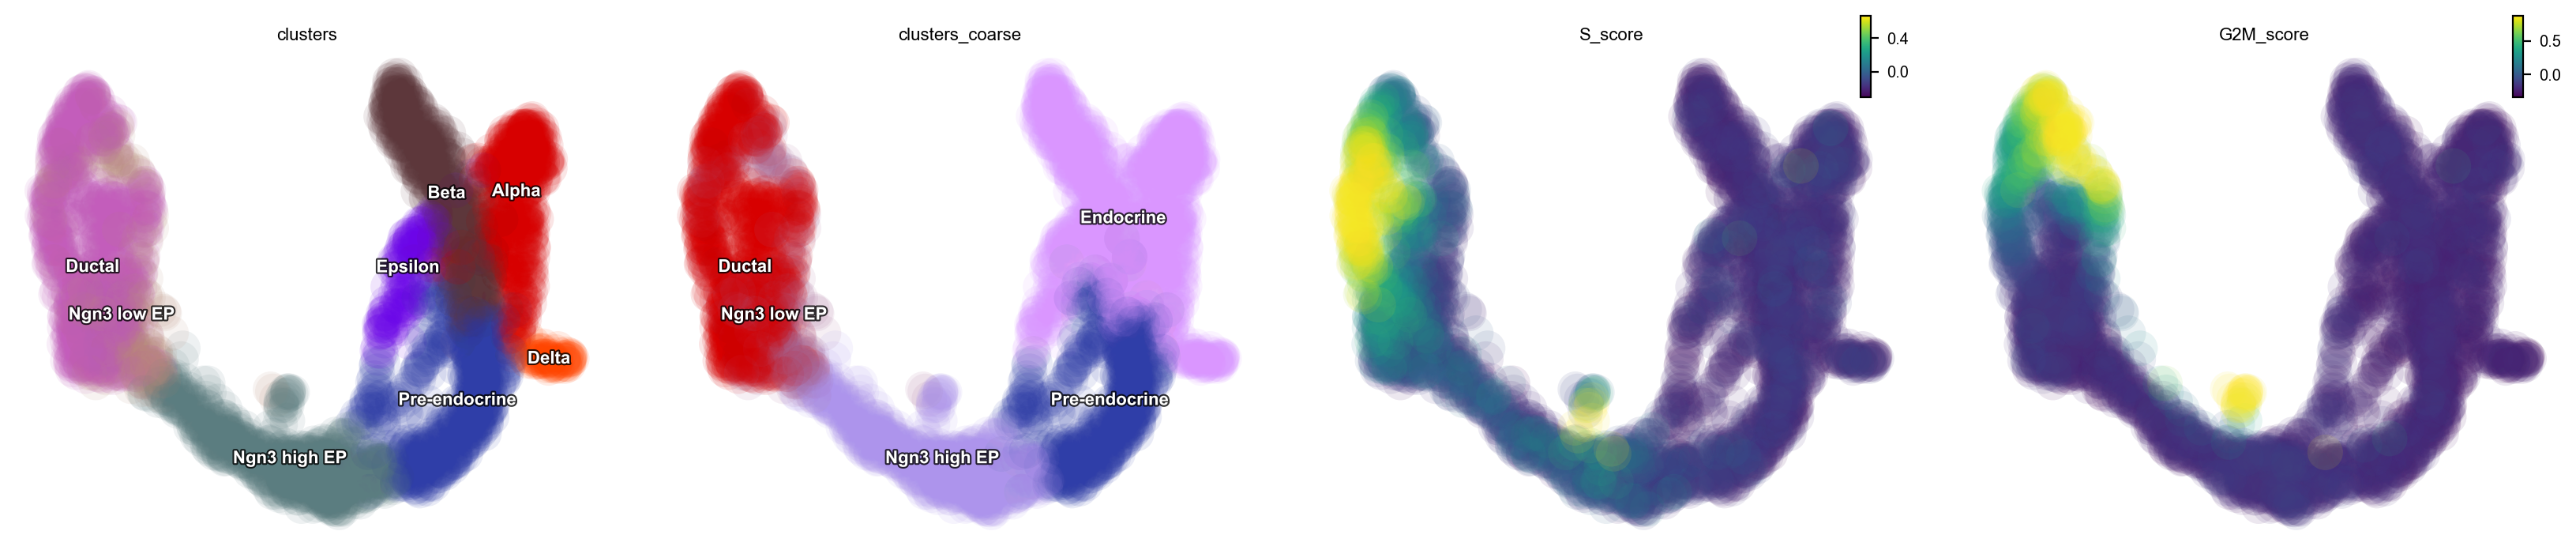

In [5]:
dyn.pl.umap(adata, color=['clusters', 'clusters_coarse', "S_score", "G2M_score"], ncols=4, alpha=0.1)

/Users/xqiu/anaconda3/lib/python3.6/site-packages/dynamo_release-0.95.0-py3.6.egg/dynamo/plot/scatters.py:452: FutureWarning: Categorical.to_dense is deprecated and will be removed in a future version.  Use np.asarray(cat) instead.
  labels = _color.to_dense() if is_categorical_dtype(_color) else _color


<Figure size 600x400 with 0 Axes>

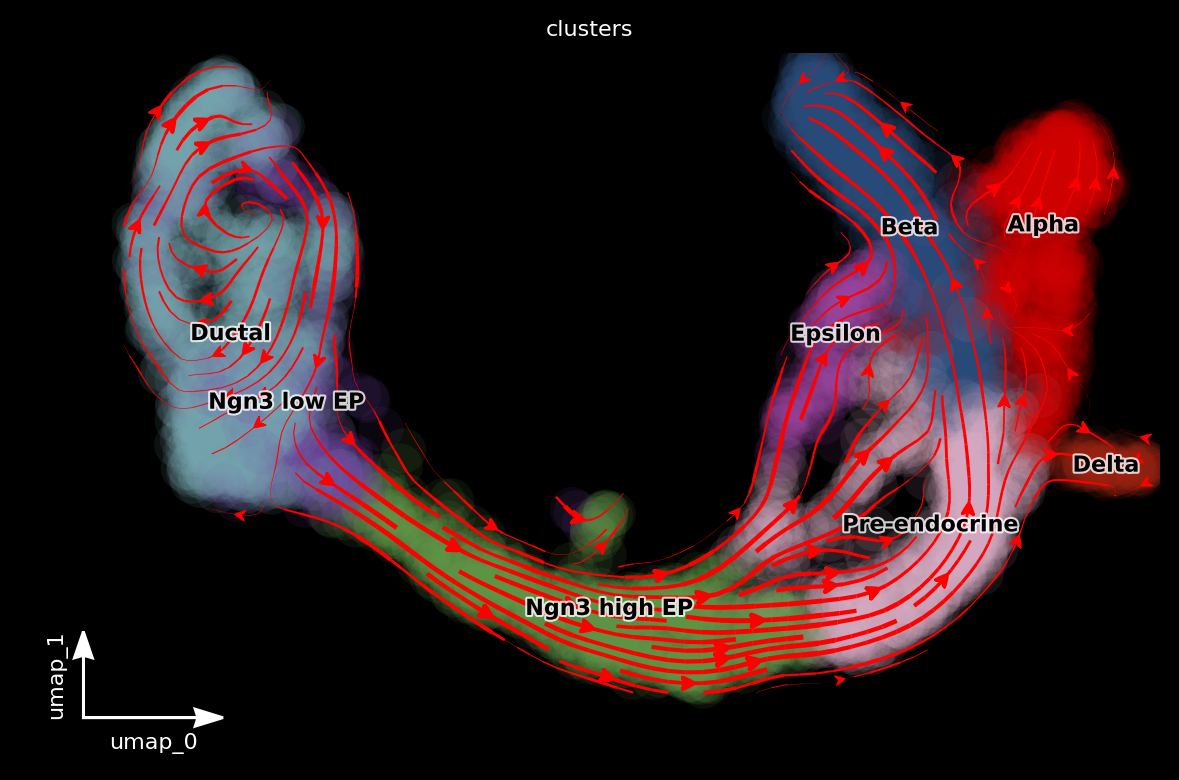

In [6]:
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', background='black')


/Users/xqiu/anaconda3/lib/python3.6/site-packages/dynamo_release-0.95.0-py3.6.egg/dynamo/plot/scatters.py:452: FutureWarning: Categorical.to_dense is deprecated and will be removed in a future version.  Use np.asarray(cat) instead.
  labels = _color.to_dense() if is_categorical_dtype(_color) else _color


<Figure size 800x600 with 0 Axes>

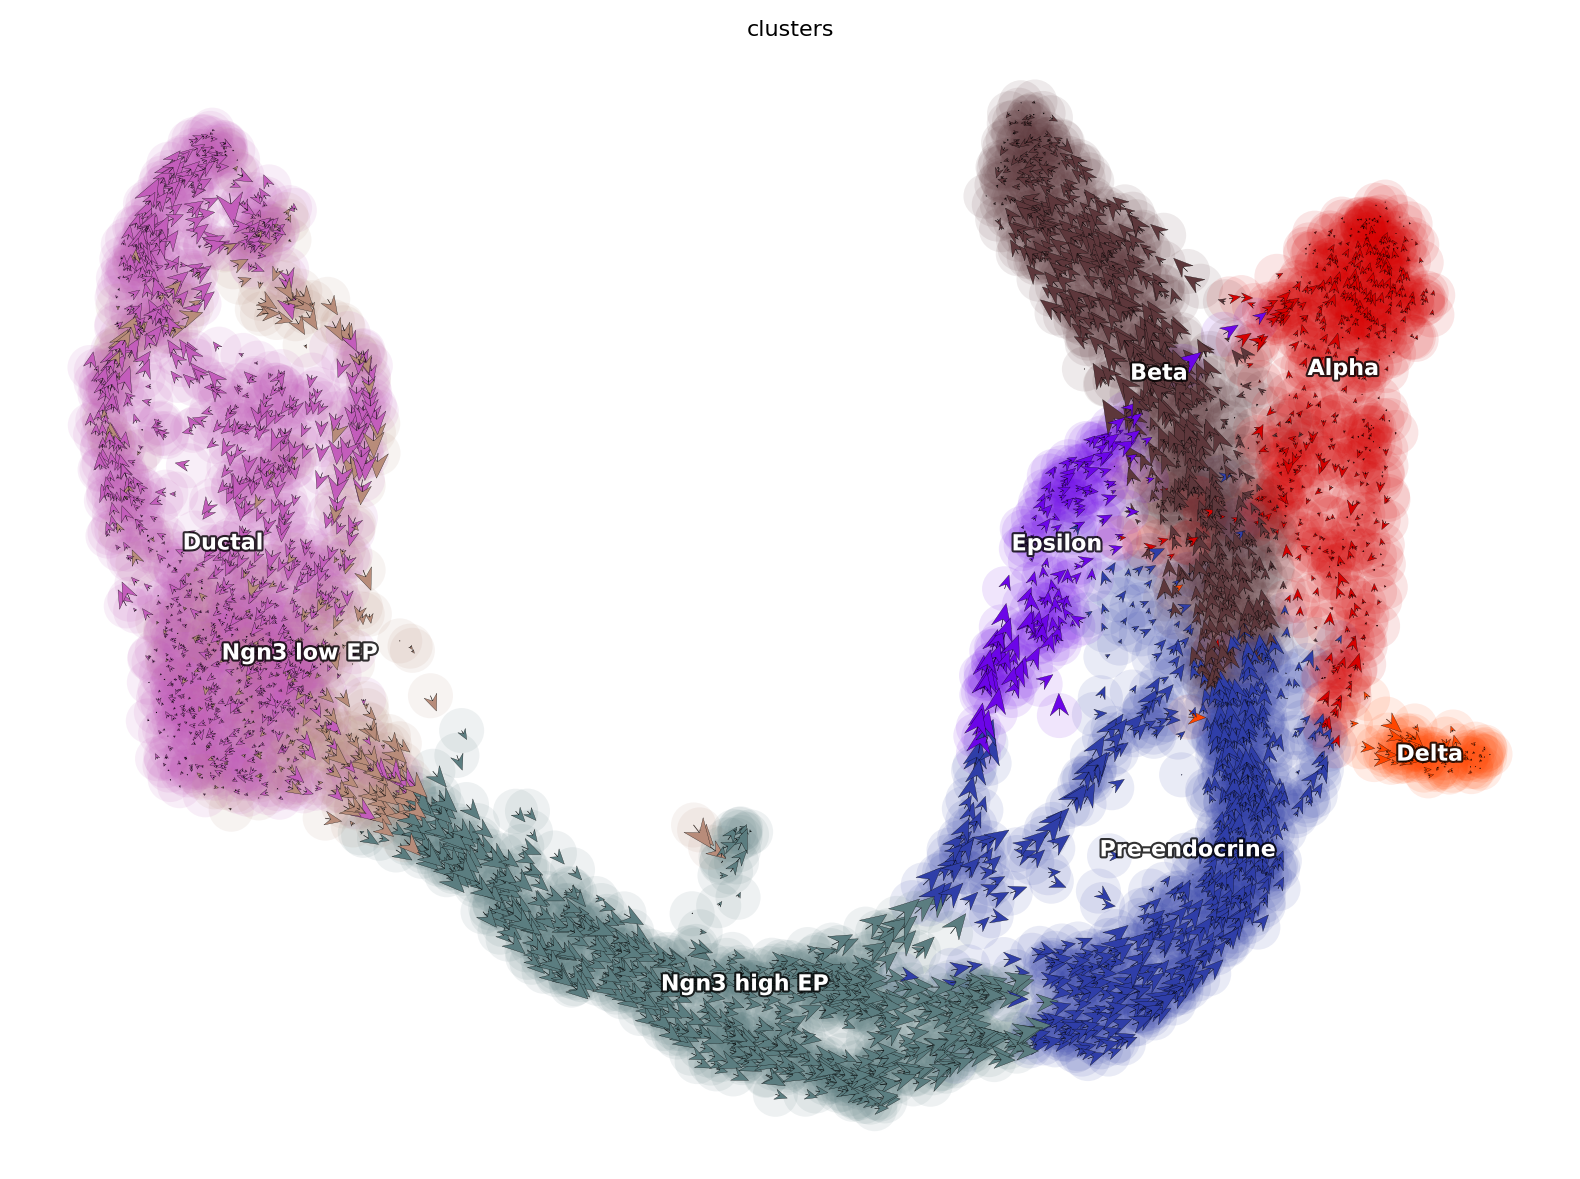

In [7]:
dyn.pl.cell_wise_vectors(adata, color=['clusters'], basis='umap', show_legend='on data', quiver_length=6, quiver_size=6, figsize=(8, 6), show_arrowed_spines=False)


In [8]:
# ok some exciting vector field analysis 

dyn.vf.VectorField(adata, basis='umap', pot_curl_div=True, verbose=3) # , M=1000, MaxIter=1000


Sampling control points based on data velocity magnitude...
Time elapsed for 'con_K': 0.0005 s
Time elapsed for 'con_K': 0.0080 s
Time elapsed for 'con_K': 0.0045 s

iterate: 0, gamma: 0.900, energy change rate: 1.000e+00, sigma2=1.454e-01
Time elapsed for computing lhs and rhs: 0.006651 s
Time elapsed for 'lstsq_solver': 0.0010 s

iterate: 1, gamma: 0.948, energy change rate: 6.835e-01, sigma2=2.068e-02
Time elapsed for computing lhs and rhs: 0.011594 s
Time elapsed for 'lstsq_solver': 0.0006 s

iterate: 2, gamma: 0.950, energy change rate: 1.011e+00, sigma2=1.408e+00
Time elapsed for computing lhs and rhs: 0.008336 s
Time elapsed for 'lstsq_solver': 0.0015 s

iterate: 3, gamma: 0.823, energy change rate: 9.728e+01, sigma2=2.233e-02
Time elapsed for computing lhs and rhs: 0.005929 s
Time elapsed for 'lstsq_solver': 0.0006 s

iterate: 4, gamma: 0.950, energy change rate: 6.106e-02, sigma2=1.555e-02
Time elapsed for computing lhs and rhs: 0.006766 s
Time elapsed for 'lstsq_solver': 0.00

/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Constructing diffusion graph from reconstructed vector field: 3696it [00:48, 76.27it/s]
Calculating divergence: 100%|██████████| 3696/3696 [00:00<00:00, 14979.14it/s]


In [ ]:
dyn.pl.topography(adata, color=['clusters'], basis='umap', background='white', 
                  streamline_color='black', show_legend='on data', terms=("streamline"))


In [ ]:
dyn.pl.topography(adata, basis='umap', background='white', color=['ntr', 'clusters'], streamline_color='black', show_legend='on data')


In [ ]:
dyn.tl.cell_velocities(adata, basis='pca')
dyn.vf.VectorField(adata, basis='pca')
dyn.vf.speed(adata)
dyn.vf.divergence(adata)
dyn.vf.acceleration(adata)
dyn.vf.curl(adata)

In [ ]:
adata

In [ ]:
import matplotlib.pyplot as plt
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(12, 8))
f1_axes
f1_axes[0, 0] = dyn.pl.cell_wise_vectors(adata, color='umap_ddhodge_potential', pointsize=0.1, alpha = 0.7, ax=f1_axes[0, 0], quiver_length=6, quiver_size=6, save_show_or_return='return')
f1_axes[0, 1] = dyn.pl.grid_vectors(adata, color='speed_umap', ax=f1_axes[0, 1], quiver_length=12, quiver_size=12, save_show_or_return='return')
f1_axes[1, 0] = dyn.pl.streamline_plot(adata, color='divergence_pca', ax=f1_axes[1, 0], save_show_or_return='return')
f1_axes[1, 1] = dyn.pl.streamline_plot(adata, color='acceleration_umap', ax=f1_axes[1, 1], save_show_or_return='return')
plt.show()

In [ ]:
# emulate ggplot2 plotting styple with black background
dyn.configuration.set_figure_params('dynamo', background='black')  

In [ ]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(12, 8))
f1_axes
f1_axes[0, 0] = dyn.pl.cell_wise_vectors(adata, color='umap_ddhodge_potential', pointsize=0.1, alpha = 0.7, ax=f1_axes[0, 0], quiver_length=6, quiver_size=6, save_show_or_return='return', background='black')
f1_axes[0, 1] = dyn.pl.grid_vectors(adata, color='speed_umap', ax=f1_axes[0, 1], quiver_length=12, quiver_size=12, save_show_or_return='return', background='black')
f1_axes[1, 0] = dyn.pl.streamline_plot(adata, color='divergence_pca', ax=f1_axes[1, 0], save_show_or_return='return', background='black')
f1_axes[1, 1] = dyn.pl.streamline_plot(adata, color='acceleration_umap', ax=f1_axes[1, 1], save_show_or_return='return', background='black')
plt.show()